In [1]:
%matplotlib inline  
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('application_train.csv')
test = pd.read_csv('application_test.csv')

# Exploration

## We print first explore our data by looking some rows, column names, and plotting some exploratory charts.

In [3]:
print('Training data shape: ', train.shape)
train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


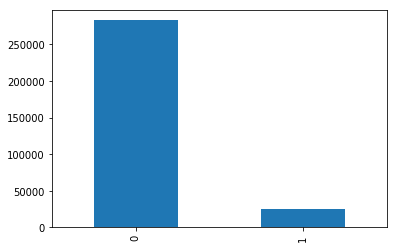

In [4]:
train['TARGET'].value_counts().plot.bar()

In [5]:
for i,j in zip(train.columns,train.dtypes):
    print(i,j)

SK_ID_CURR int64
TARGET int64
NAME_CONTRACT_TYPE object
CODE_GENDER object
FLAG_OWN_CAR object
FLAG_OWN_REALTY object
CNT_CHILDREN int64
AMT_INCOME_TOTAL float64
AMT_CREDIT float64
AMT_ANNUITY float64
AMT_GOODS_PRICE float64
NAME_TYPE_SUITE object
NAME_INCOME_TYPE object
NAME_EDUCATION_TYPE object
NAME_FAMILY_STATUS object
NAME_HOUSING_TYPE object
REGION_POPULATION_RELATIVE float64
DAYS_BIRTH int64
DAYS_EMPLOYED int64
DAYS_REGISTRATION float64
DAYS_ID_PUBLISH int64
OWN_CAR_AGE float64
FLAG_MOBIL int64
FLAG_EMP_PHONE int64
FLAG_WORK_PHONE int64
FLAG_CONT_MOBILE int64
FLAG_PHONE int64
FLAG_EMAIL int64
OCCUPATION_TYPE object
CNT_FAM_MEMBERS float64
REGION_RATING_CLIENT int64
REGION_RATING_CLIENT_W_CITY int64
WEEKDAY_APPR_PROCESS_START object
HOUR_APPR_PROCESS_START int64
REG_REGION_NOT_LIVE_REGION int64
REG_REGION_NOT_WORK_REGION int64
LIVE_REGION_NOT_WORK_REGION int64
REG_CITY_NOT_LIVE_CITY int64
REG_CITY_NOT_WORK_CITY int64
LIVE_CITY_NOT_WORK_CITY int64
ORGANIZATION_TYPE object
EXT_SOUR

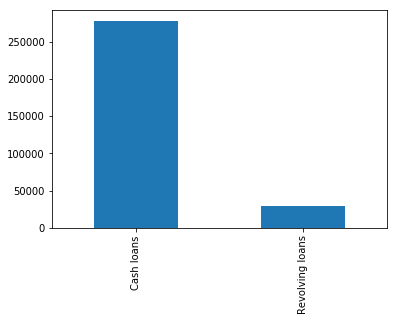

In [6]:
train.NAME_CONTRACT_TYPE.value_counts().plot.bar()

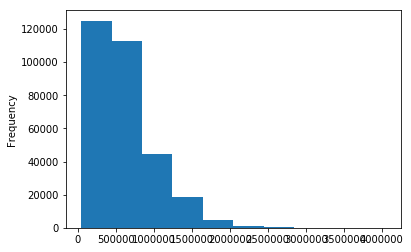

In [7]:
train.AMT_CREDIT.plot.hist()

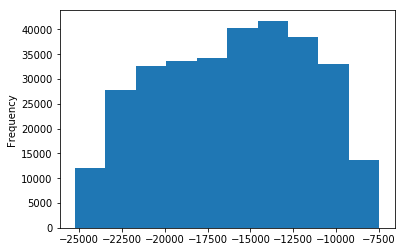

In [8]:
train.DAYS_BIRTH.plot.hist()

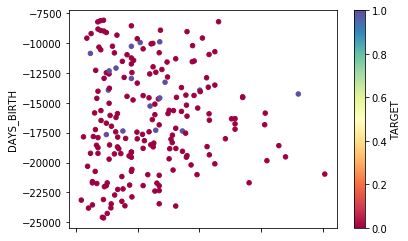

In [9]:
train.sample(n=200).plot.scatter(x='AMT_CREDIT',y='DAYS_BIRTH',c='TARGET',  cmap="Spectral")

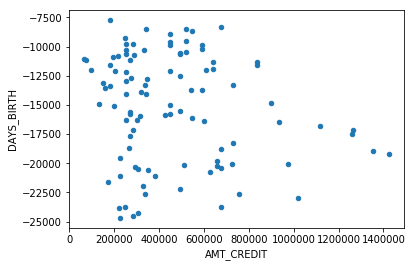

In [10]:
train[train.TARGET==1].sample(n=100).plot.scatter(x='AMT_CREDIT',y='DAYS_BIRTH')

In [11]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [12]:
# Fix  missing columns from the testing dataset 
labels = train['TARGET']
train, test = train.align(test, join = 'inner', axis = 1)
train['TARGET'] = labels


In [13]:
cor = train.corr()
correlations = cor['TARGET'].sort_values()

In [14]:
abs(correlations).sort_values(ascending=False)[:20]

TARGET                                               1.000000
EXT_SOURCE_3                                         0.178919
EXT_SOURCE_2                                         0.160472
EXT_SOURCE_1                                         0.155317
DAYS_BIRTH                                           0.078239
REGION_RATING_CLIENT_W_CITY                          0.060893
REGION_RATING_CLIENT                                 0.058899
NAME_INCOME_TYPE_Working                             0.057481
NAME_EDUCATION_TYPE_Higher education                 0.056593
DAYS_LAST_PHONE_CHANGE                               0.055218
CODE_GENDER_M                                        0.054713
CODE_GENDER_F                                        0.054704
DAYS_ID_PUBLISH                                      0.051457
REG_CITY_NOT_WORK_CITY                               0.050994
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
NAME_INCOME_TYPE_Pensioner                           0.046209
ORGANIZA

In [15]:
train['DAYS_BIRTH'].corr(train['TARGET'])

0.07823930830982712

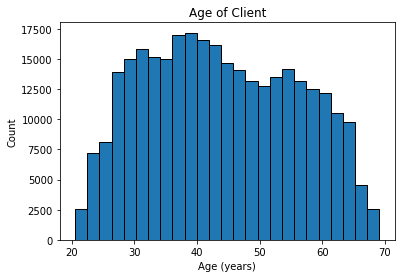

In [16]:
plt.hist(train['DAYS_BIRTH'] / -365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

# Hypothesis Testing

We claim that old people (56+) are less likely to default a home credit.

Null: Old people has same default rate as young people
H1: Old people has less default rate than young people 

In [17]:
t = train[['TARGET',]]
t['old']=train.DAYS_BIRTH<train.DAYS_BIRTH.quantile(0.2)
table = pd.crosstab(index=[t.old], columns=t.TARGET)

In [18]:
train.DAYS_BIRTH.quantile(0.2)/-365

56.09315068493151

In [19]:
table

TARGET,0,1
old,,
False,224366,21650
True,58320,3175


In [20]:
print(21650/224366)
print(3175/58320)

0.09649412121266146
0.054441015089163235


We apply chi2 test to test our hypothesis

In [21]:
# from sklearn documentation
chi_stats = stats.chi2_contingency(table)
print ('Test t=%f p-value=%f' % (chi_stats[0], chi_stats[1]))
chi_stats

Test t=876.529392 p-value=0.000000


(876.5293915778159,
 1.242006190327437e-192,
 1,
 array([[226155.4187525,  19860.5812475],
        [ 56530.5812475,   4964.4187525]]))

In [22]:
critical_value = crit = stats.chi2.ppf(q = 1 - 0.05, df = chi_stats[2])
critical_value

3.841458820694124

In [23]:
observed_chi_val = chi_stats[0]
if observed_chi_val <= critical_value:
    print ('Null hypothesis cannot be rejected')
else:
    print ('reject null hypothesis')

reject null hypothesis


In [24]:
# first we clean our data

from sklearn.preprocessing import MinMaxScaler, Imputer
# for this part we have used code from StackOverflow
# this part fills missing values with its median(middle number)
tr = train.drop(columns = ['TARGET'])
features = list(tr.columns)
te = test.copy()
imputer = Imputer(strategy = 'median')
scaler = MinMaxScaler(feature_range = (0, 1))
imputer.fit(tr)
tr = imputer.transform(tr)
te = imputer.transform(test)

# We normalize values with scaler, make columns between 0 and 1
scaler.fit(tr)
tr = scaler.transform(tr)
te = scaler.transform(te)

## Linear Regression

In [25]:
from sklearn.linear_model import LogisticRegression

# Regression
log_reg = LogisticRegression(C = 0.0001,class_weight="balanced")
log_reg.fit(tr, labels)

LogisticRegression(C=0.0001, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [26]:
y_ = log_reg.predict(tr)

In [27]:
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(labels, y_)
cmat

array([[184838,  97848],
       [  8436,  16389]], dtype=int64)

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# for good looking prediction rates for both default and no default 
# code is taken from https://gist.github.com/hitvoice/36cf44689065ca9b927431546381a3f7
def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(10,10)):
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)

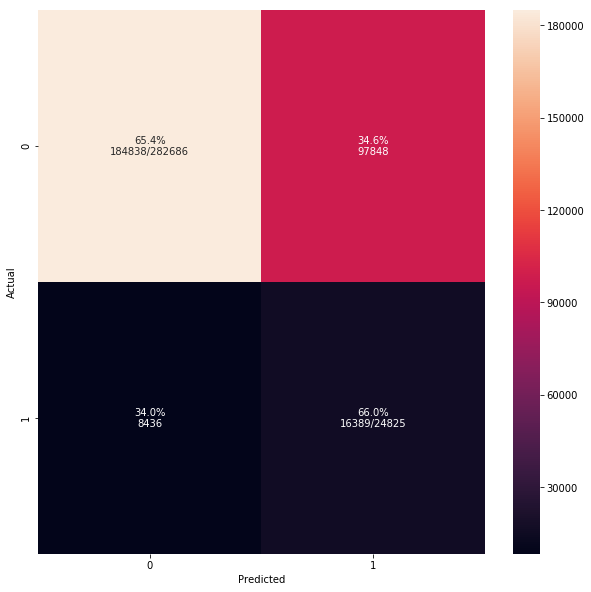

In [29]:
cm_analysis(labels, y_, [0,1])

Our linear regression classifier predicts ~65% of the data, to improve this results we will work on more complex classifiers

# Machine Learning

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

First we fill NA values with medians and, remove TARGET column from inputs

In [39]:
train = train.fillna(train.median())
train = train.drop(columns = ['TARGET'])

To not overfit, we split our data into two; Train and test datasets are created with size of 50K

In [40]:
X_train, X_test, y_train, y_test = train_test_split(train, labels,train_size=50000, test_size=50000, random_state=1)

We tried SVM and Random forest for this problem. Other algorithms such as neural networks had poor performance and accuracy.

## SVM

In [41]:

svm = LinearSVC(class_weight = 'balanced')
svm.fit(X_train, y_train)
train_score = svm.score(X_train, y_train)
test_score = svm.score(X_test, y_test)

print ("Training accuracy: %s \n Testing accuracy: %s" % (train_score,test_score))

Training accuracy: 0.0845 
 Testing accuracy: 0.08412


Since our dataset is skewed, not so many defaulted loans. We used Class weights, it gives 1/# elements in class to weights. So that each class as equal chance to be learn. Otherwise if model predicts target=0 all the time, it still gets .92 accuracy 

We used confusion matrix to see prediction distributions, since class are unbalanced

In [42]:
y_ = svm.predict(X_test)
cmat = confusion_matrix(y_test, y_)
cmat

array([[  189, 45790],
       [    4,  4017]], dtype=int64)

## Neural Networks

In [55]:
nn = MLPClassifier()
nn.fit(X_train, y_train)
train_score = tree.score(X_train, y_train)
test_score = tree.score(X_test, y_test)

print ("Training accuracy: %s \nTesting accuracy: %s" % (train_score,test_score))

Training accuracy: 0.91892 
Testing accuracy: 0.91958


In [56]:
y_ = nn.predict(X_test)
cmat = confusion_matrix(y_test, y_)
cmat

array([[45979,     0],
       [ 4021,     0]], dtype=int64)

## Random Forest Decision Tree

In [51]:
tree = RandomForestClassifier(class_weight = 'balanced_subsample')
tree.fit(X_train, y_train)
train_score = tree.score(X_train, y_train)
test_score = tree.score(X_test, y_test)

print ("Training accuracy: %s \nTesting accuracy: %s" % (train_score,test_score))

Training accuracy: 0.99978 
Testing accuracy: 0.98854


We repeat same with Random Forest, but the results are much better

In [52]:
y_ = tree.predict(X_test)
cmat = confusion_matrix(y_test, y_)
cmat

array([[45979,     0],
       [  573,  3448]], dtype=int64)

In [48]:
def importance_(forest, cols):
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")
    l=20
    for f in range(l):
        print("%d. feature %s (%f)" % (f + 1, cols[indices[f]], importances[indices[f]]))

importance_(tree, X_train.columns)

Feature ranking:
1. feature EXT_SOURCE_3 (0.064110)
2. feature EXT_SOURCE_2 (0.062154)
3. feature DAYS_BIRTH (0.036671)
4. feature DAYS_ID_PUBLISH (0.032723)
5. feature DAYS_LAST_PHONE_CHANGE (0.030894)
6. feature EXT_SOURCE_1 (0.029029)
7. feature AMT_CREDIT (0.028085)
8. feature DAYS_REGISTRATION (0.027987)
9. feature SK_ID_CURR (0.027985)
10. feature AMT_GOODS_PRICE (0.027689)
11. feature AMT_ANNUITY (0.027481)
12. feature DAYS_EMPLOYED (0.026174)
13. feature REGION_POPULATION_RELATIVE (0.023992)
14. feature AMT_INCOME_TOTAL (0.022771)
15. feature HOUR_APPR_PROCESS_START (0.020914)
16. feature AMT_REQ_CREDIT_BUREAU_YEAR (0.014182)
17. feature OWN_CAR_AGE (0.012724)
18. feature OBS_60_CNT_SOCIAL_CIRCLE (0.010189)
19. feature OBS_30_CNT_SOCIAL_CIRCLE (0.010186)
20. feature LIVINGAREA_AVG (0.009004)


Most important features are credit scores, EXT_SOURCE_3 and EXT_SOURCE_2, age, and days between number change. Also, assests play important role in credit default.